Question 1: How many records are present in the dataset? Print the metadata information of the dataset?

In [35]:
#Importing Pandas to work with DataFrames
import pandas as pd

#Loads the dataset into a Pandas DataFrame
mydata=pd.read_csv("bollywood.csv") 

# Shape[0] returns the number of rows in a dataset, Shape[1] returns number of columns.
rows = mydata.shape[0]  

#print the parameters of the method
print("Number of Records: ", rows)

#print 2 blank lines for ease of readability 
print('\n'*2)

#Computing metadata of the dataset
#The parameter verbose = True displays all the columns and their respective DataTypes
#The parameter memory_usage = False does not display the memory usage
mydata.info(verbose=True,memory_usage=False)

Number of Records:  149



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)

Question 2: How many movies got released in each genre? Which genre had the highest number of releases? Sort number of releases in each genre in decending order?


In [36]:

#pivot_table Creates a pivot table 
#Parameters
#values decides which column will be subjected to aggregation function
#Index decides based on which column we will aggregate
#aggfunc decides how we will aggregate.

Table1=pd.pivot_table(mydata,values=["SlNo"],index=["Genre"],aggfunc="count")

print(Table1.round(2))

          SlNo
Genre         
Action      24
Comedy      36
Drama       35
Romance     25
Thriller    29


Answer: The Comedy genre had the highest number of releases.

Question 3: How many movies in each genre got released in different release times like long weekend, festive season, etc


In [37]:

#crosstab helps us to find occurrences of combination of two values
#First parameter is the first column for the combination
#Second parameter is the second column for the combination
#margins = True helps us to create column and row-wise totals
#margins_name = Name of the total column

Table2=pd.crosstab(mydata.Genre,mydata.ReleaseTime,margins=True, margins_name="Total")
print(Table2)

ReleaseTime  FS  HS  LW   N  Total
Genre                             
Action        3   3   3  15     24
Comedy        3   5   5  23     36
Drama         4   6   1  24     35
Romance       3   3   4  15     25
Thriller      4   1   2  22     29
Total        17  18  15  99    149


Question 4: Which month of the year, maximum number movie release are seen

In [38]:

#Creating a new column to hold the Month of Release
mydata['Month'] = pd.DatetimeIndex(mydata['Release Date']).month

#pivot_table Creates a pivot table 
#Parameters
#values decides which column will be subjected to aggregation function
#Index decides based on which column we will aggregate
#aggfunc decides how we will aggregate.s

#Table3=pd.pivot_table(mydata,values=["SlNo"],index=["Month"],aggfunc="count").reset_index().rename(columns={'SlNo': 'serial'})

#Table3.sort_values(by ='serial', ascending = False)


#print(Table3.round(2))

Table3=pd.pivot_table(mydata,values=["SlNo"],index=["Month"],aggfunc="count").reset_index().rename(columns={'SlNo': 'serial'})

print(Table3.sort_values(by ='serial', ascending = False).head(1))

   Month  serial
0      1      20


Answer: Thus, Maximum number of movie releases happen in Month 1 (January)

Question 5: Which month of the year typically sees most release of high budgeted movies, that is, movies with budget of 25 crore or more?

In [39]:

#Setting up a filter for films with budget over 25 crore
data1=mydata.loc[mydata['Budget'] >= 25] 

#Creating a pivot table
#Parameters
#values decides which column will be subjected to aggregation function
#Index decides based on which column we will aggregate
#aggfunc decides how we will aggregate.
#reset_Index().rename will assign a new name to the aggregated column
Table4=pd.pivot_table(data1,values=["Budget"],index=["Month"],aggfunc="count").reset_index().rename(columns={'Budget': 'HighBudgetCount'})

#Return the highest count in the aggregated column
max_count = Table4["HighBudgetCount"].max()

#Return the month number with count = max_count calculated above. 
month_num = Table4.loc[Table4["HighBudgetCount"] == max_count]["Month"].min()
print("The Month with most release of high budgeted movies is Month", month_num)
print(f"The Month has {max_count} releases.")




The Month with most release of high budgeted movies is Month 2
The Month has 9 releases.


Question 6: Which are the top 10 movies with maximum return on investment (ROI)? 

In [40]:


data2=mydata['ROI'] = mydata.apply(lambda x: (x['BoxOfficeCollection'] - x['Budget'])/x['Budget'], axis=1)
print(mydata.nlargest(10,['ROI'])[['MovieName', 'ROI']])

                     MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


Question 7: Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [41]:

print(mydata.groupby('ReleaseTime', as_index=False)['ROI'].mean())

  ReleaseTime       ROI
0          FS  0.973853
1          HS  0.850867
2          LW  1.127205
3           N  0.657722


Answer: The movies have a higher ROI if they are released on Long Weekends.

Question 8: Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

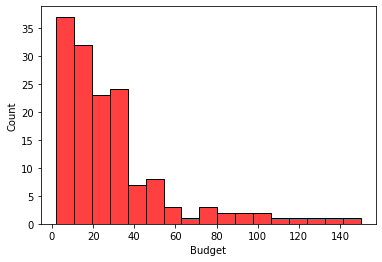

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Distribution of Budget')

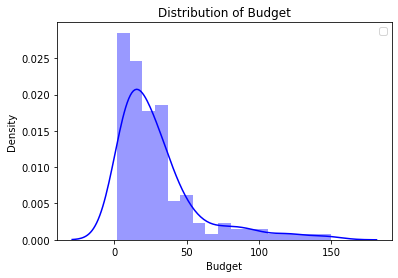

In [42]:

import seaborn as sn
import matplotlib.pyplot as plt
sn.histplot(mydata.Budget,color="r")
#sn.displot(mydata.Budget,color="r")
plt.show()

sn.distplot(mydata.Budget,color="b")
plt.legend()
plt.title("Distribution of Budget")

Answer: Based on the Histogram and the distribution plot, most of the movies are below a budget of 40 crores. Thus we can say that most of the movies are low budget movies.

Question 9: Compare the distribution of ROIs between movies with comedy genre and drama. Which genere typically sees higher ROIs?


C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Comparative Distribution of ROI for Comedy and Drama')

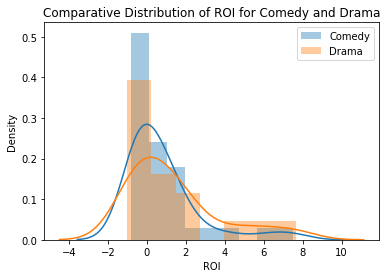

In [43]:

sn.distplot(mydata.ROI[mydata.Genre =="Comedy"],label="Comedy")
sn.distplot(mydata.ROI[mydata.Genre =="Drama"],label="Drama")
plt.legend()
plt.title("Comparative Distribution of ROI for Comedy and Drama")

Answer: Out of the two, Drama genre has a higher ROI than Comedy.

Question10: Is there a correlation between Box Office Collection and YouTube likes? Is the correlation positive or negative?

In [44]:

column_1 = mydata["BoxOfficeCollection"]
column_2 = mydata["YoutubeLikes"]
correlation = column_1.corr(column_2)
print(correlation)

#Another Method
#mydata[["BoxOfficeCollection","YoutubeLikes",]].corr()

0.6825165877731297


Answer: Box office collection and YouTube Likes are positively correlated.

Question 11: Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare

<AxesSubplot:xlabel='YoutubeLikes', ylabel='Genre'>

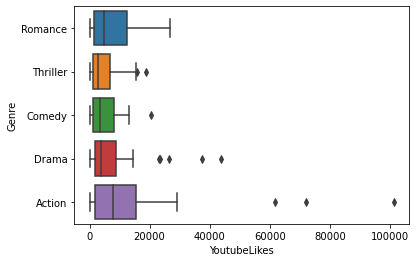

In [45]:

#sn.boxplot(y=mydata.YoutubeLikes, x= mydata.Genre)
sn.boxplot(y=mydata.Genre, x= mydata.YoutubeLikes)

Answer: Action movies typically see more YouTube likes

Question 12: Which of the variables among Budget, BoxOfficeCollection, YouTubeViews, YouTubeLikes, YouTubeDislikes are highly correlated? Note: Draw pair plot or heatmap


Text(0.5, 1.0, 'Correlation Heatmap')

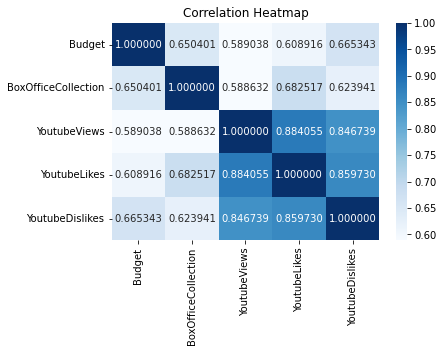

In [46]:

data3=mydata.iloc[:,5:10]
data3.head()

abcd=data3[["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]].corr()
sn.heatmap(abcd,annot=True,cmap="Blues",fmt="0.6f")
plt.title("Correlation Heatmap")
#sn.heatmap(mydata,values=["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"],annot=True,cmap="Blues",fmt="0.2f")
#plt.title("Correlation Heatmap")



Answer: The cells in darker shades of blue (Except the diagonal) are highly correlated.